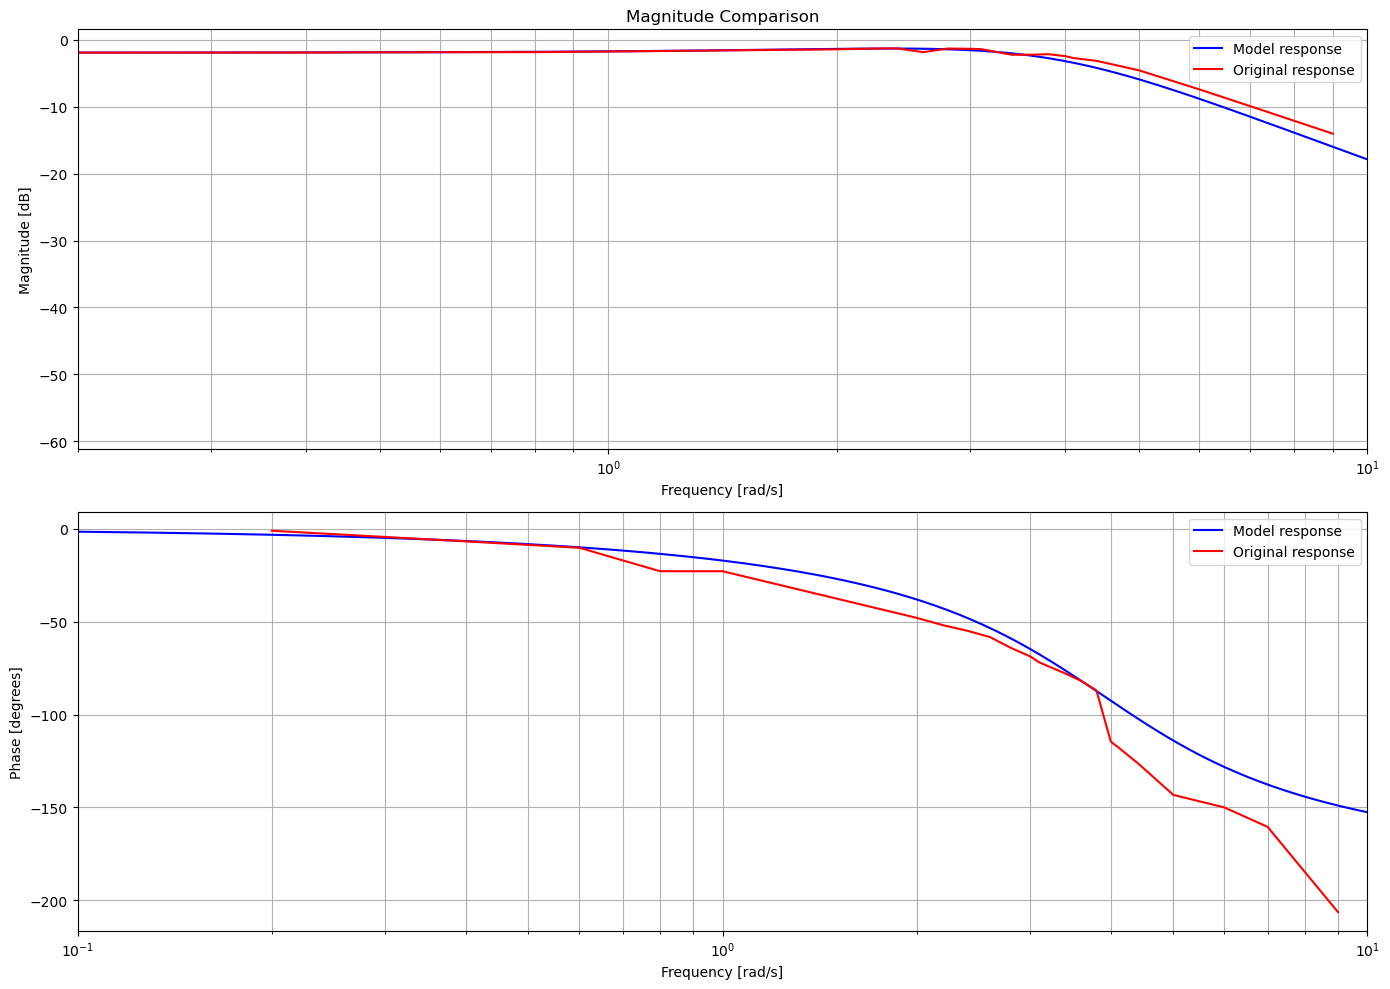

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# New data provided
data = np.array([
    [0.2, 0.802, 1.1459],
    [0.4, 0.804, 6.8755],
    [0.6, 0.808, 10.3132],
    [0.8, 0.809, 22.9183],
    [1.0, 0.818, 22.9183],
    [2.0, 0.849, 48.00],
    [2.2, 0.859, 52.00],
    [2.4, 0.863, 55.0039],
    [2.6, 0.809, 58.3814],
    [2.8, 0.861, 64.17],
    [3.0, 0.857, 68.7549],
    [3.1, 0.852, 72.0],
    [3.4, 0.774, 77.9223],
    [3.6, 0.774, 82.00],
    [3.8, 0.781, 87.0896],
    [4.0, 0.755, 114.5916],
    [4.1, 0.731, 117.4563],
    [4.4, 0.696, 126.0507],
    [5.0, 0.592, 143.2394],
    [6.0, 0.427, 150.00],
    [7.0, 0.32, 160.4282],
    [9.0, 0.199, 206.2648]
])

# Extract frequency, gain, and phase from the data
frequency = data[:, 0]
gain = data[:, 1]
phase = data[:, 2]

# Convert gain to dB
gain_dB = 20 * np.log10(gain)

# Phase degrees are already in the right format, but we might need to adjust the sign
# Check the range and adjust if necessary
phase_degrees = -phase

# Parameters for transfer function
omega_n = 3.9
zeta = 0.5637
K = 0.802

# Transfer function components
numerator1 = [K * omega_n**2]
denominator1 = [1, 2 * zeta * omega_n, omega_n**2]

# Create transfer function
sys1 = signal.TransferFunction(numerator1, denominator1)

# Frequency range for Bode plot
omega = np.logspace(-1, 2, 500)

# Compute the Bode plot for sys1
w1, mag1, phase1 = signal.bode(sys1, omega)

# Plot the Bode plot and collected data
plt.figure(figsize=(14, 10))

# Bode magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(w1, mag1, label='Model response', color='b')
plt.plot(frequency, gain_dB, '-', label='Original response', color='r')
plt.xlim([0.2, 10])
plt.title('Magnitude Comparison')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')
plt.legend()

# Bode phase plot
plt.subplot(2, 1, 2)
plt.semilogx(w1, phase1, label='Model response', color='b')
plt.plot(frequency, phase_degrees, '-', label='Original response', color='r')
plt.xlim([0.1, 10])
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.grid(which='both', axis='both')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


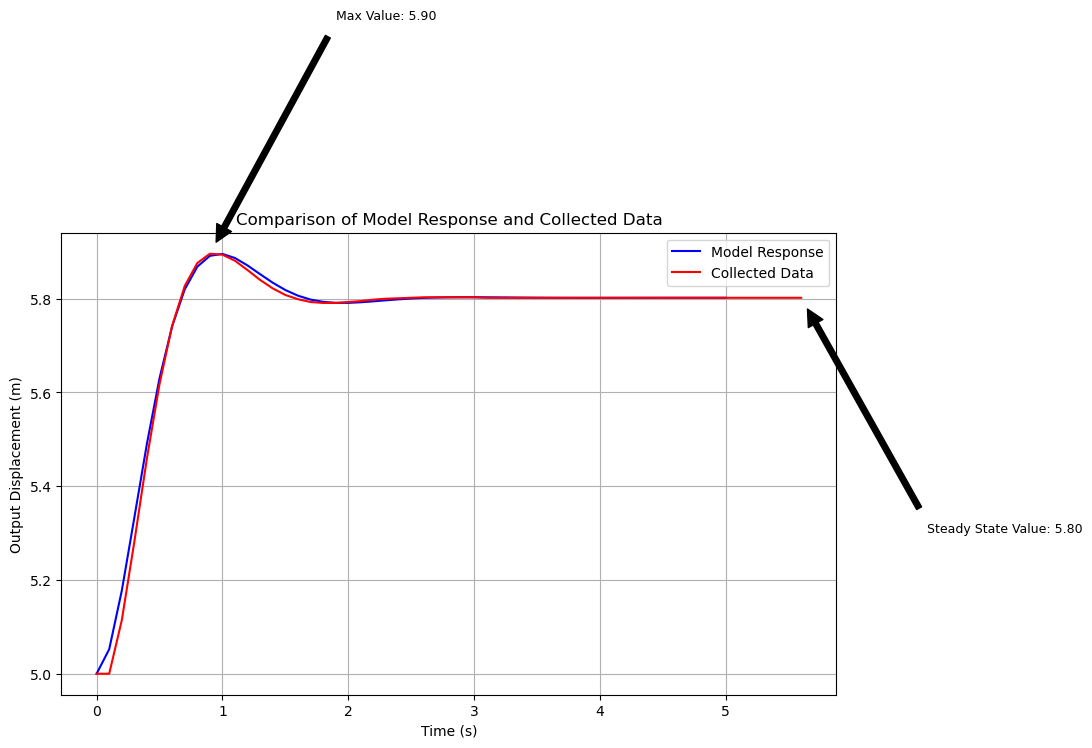

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# System parameters
omega_n = 3.9
zeta = 0.5637
K = 0.802

# Transfer function coefficients
num = [K * omega_n**2]
den = [1, 2 * zeta * omega_n, omega_n**2]

# Create a transfer function system
system = signal.lti(num, den)

# Time vector for model response
t_model = np.arange(0, 5.1, 0.1)

# Step response
t_model, y1 = signal.step(system, T=t_model)

# Adjusting the model response
y1 = y1 + 5

# New data
data = np.array([
   [24.4, 1, 5], [24.5, 1, 5],
    [24.6, 1, 5.114], [24.7, 1, 5.282], [24.8, 1, 5.46], [24.9, 1, 5.618], [25, 1, 5.742],
    [25.1, 1, 5.827], [25.2, 1, 5.876], [25.3, 1, 5.896], [25.4, 1, 5.894], [25.5, 1, 5.881],
    [25.6, 1, 5.861], [25.7, 1, 5.84], [25.8, 1, 5.822], [25.9, 1, 5.808], [26, 1, 5.799],
    [26.1, 1, 5.793], [26.2, 1, 5.791], [26.3, 1, 5.791], [26.4, 1, 5.793], [26.5, 1, 5.795],
    [26.6, 1, 5.798], [26.7, 1, 5.8], [26.8, 1, 5.801], [26.9, 1, 5.802], [27, 1, 5.803],
    [27.1, 1, 5.803], [27.2, 1, 5.803], [27.3, 1, 5.803], [27.4, 1, 5.803], [27.5, 1, 5.802],
    [27.6, 1, 5.802], [27.7, 1, 5.802], [27.8, 1, 5.802], [27.9, 1, 5.802], [28, 1, 5.802],
    [28.1, 1, 5.802], [28.2, 1, 5.802], [28.3, 1, 5.802], [28.4, 1, 5.802], [28.5, 1, 5.802],
    [28.6, 1, 5.802], [28.7, 1, 5.802], [28.8, 1, 5.802], [28.9, 1, 5.802], [29, 1, 5.802],
    [29.1, 1, 5.802], [29.2, 1, 5.802], [29.3, 1, 5.802], [29.4, 1, 5.802], [29.5, 1, 5.802],
    [29.6, 1, 5.802], [29.7, 1, 5.802], [29.8, 1, 5.802], [29.9, 1, 5.802], [30, 1, 5.802]
])

# Extract time and output columns from the new data
time = data[:, 0]
time = time - 24.4
output = data[:, 2]

# Plot both responses
plt.figure(figsize=(10, 6))
plt.plot(t_model, y1, label='Model Response', linestyle='-', color='blue')
plt.plot(time, output, label='Collected Data', linestyle='-', color='red')

# Add key annotations
# Find maximum and steady state values for annotation
max_index = np.argmax(output)
max_time = time[max_index]
max_value = output[max_index]

steady_state_value = output[-1]
steady_state_time = time[-1]

plt.annotate(f'Max Value: {max_value:.2f}',
             xy=(max_time, max_value),
             xytext=(max_time + 1, max_value + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9)

plt.annotate(f'Steady State Value: {steady_state_value:.2f}',
             xy=(steady_state_time, steady_state_value),
             xytext=(steady_state_time + 1, steady_state_value - 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9)

# Add labels and legend
plt.xlabel('Time (s)')
plt.ylabel('Output Displacement (m)')
plt.title('Comparison of Model Response and Collected Data')
plt.legend()
plt.grid(True)

plt.show()
